In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events
import math


In [2]:
def draw_cubes(cubes, ticks=False, grid=True, view='', flip='', rot=0, ax3d=None):
    
    # create empty cube
    cubes_to_draw = np.zeros(cubes.shape)
    
    # set elements to 1 where colour is not empty
    cubes_to_draw[cubes!=''] = 1

    # make figure and 3d axes for plotting
    if ax3d is None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d', proj_type='ortho', box_aspect=(4,4,4))
    else:
        ax = ax3d
        
    nx, ny, nz = cubes.shape

    ax.axes.set_xlim3d(0, nx) 
    ax.axes.set_ylim3d(0, ny) 
    ax.axes.set_zlim3d(0, nz) 

    # The cubes can be plotted using a 3D voxels plot
    ax.voxels(cubes_to_draw, facecolors=cubes, edgecolors='k', shade=False);

    # view argument allows users to set a 2D projection
    if view == 'xy': ax.view_init(90, -90, 0+rot)
    elif view == '-xy': ax.view_init(-90, 90, 0-rot)
    elif view == 'xz': ax.view_init(0, -90, 0+rot)
    elif view == '-xz': ax.view_init(0, 90, 0-rot)
    elif view == 'yz': ax.view_init(0, 0, 0+rot)
    elif view == '-yz': ax.view_init(0, 180, 0-rot)
    else:   ax.view_init(azim=ax.azim+rot)

    # flip argument allows user to show a mirror image
    # flip='x' reverses image in x direction etc.
    if 'x' in flip: ax.axes.set_xlim3d(nx, 0) 
    if 'y' in flip: ax.axes.set_ylim3d(ny, 0) 
    if 'z' in flip: ax.axes.set_zlim3d(nz, 0) 

    # style figure ticks and grid lines
    if ticks==False: 
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis.line.set_linestyle('')
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            
    if grid==False and ticks==False: ax.set_axis_off()
    
    if ax3d is not None:
        # return axes with result
        return
    else:
        # show image
        display(fig)

        # delete figure
        plt.close(fig)

    return

In [3]:
event_info = {
    'type': '',
    'description': ''}

def wait_for_event(interval=0.001, max_rate=20, allow_interupt=True):    

    # set event info to be empty
    # as this is dict we can change entries
    # directly without using
    # the global keyword
    event_info['type'] = ""
    event_info['description'] = ""
   

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    return
    
    

In [4]:
# with the helper code above we can
# add buttons 
# following the example below

btn1 = widgets.Button(description="a")
btn2 = widgets.Button(description="b")
btn3 = widgets.Button(description="c")
btn4 = widgets.Button(description="d")
    
# we need to set up each button
# to call the register_event
# function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)

btn_yes = widgets.Button(description="YES")
btn_no = widgets.Button(description="no")

btn_yes.on_click(register_event)
btn_no.on_click(register_event)

In [ ]:
#function to change time from seconds to minutes 
def time_in_mins(time_taken):
    minutes = math.floor(time_taken/60)
    seconds = round(time_taken % 60)
    print(f"It took you {minutes} minutes and {seconds} seconds to complete the test!")
    return

#Function to print time taken for each question 
def time_for_question(time_taken):
    print(f"It took you {time_taken} seconds to answer this question!")
    

In [6]:
import requests
from bs4 import BeautifulSoup
import json

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok


Question 2)
Which of the following views (a-d) cannot be made by rotating the cube arrangement shown?


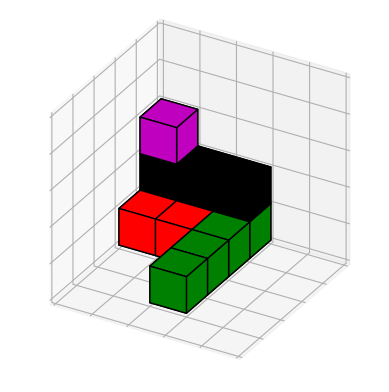

a.)


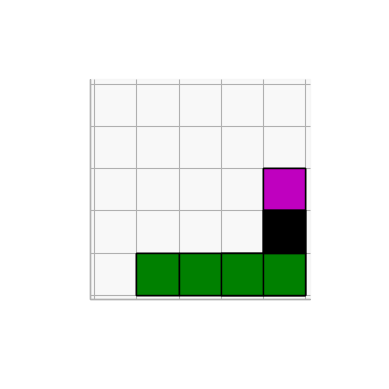

b.)


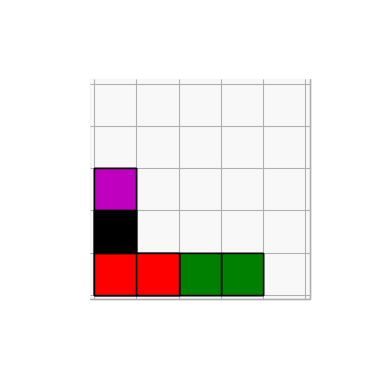

c.)


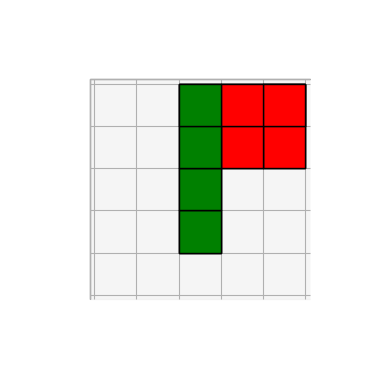

d.)


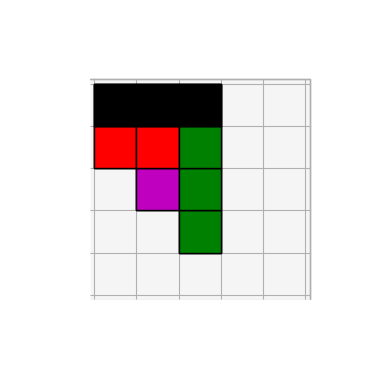

In [ ]:
print("Welcome to the spatial reasoning test!")
time.sleep(1)
print("You should aim to take around 3 minutes to complete this test")
time.sleep(2)

score = 0

#Collect user id to identnify each participant
id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:

- two letters based on the initials (first and last name) of a childhood friend

- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise

then your unique identifer would be CBTC

"""

print(id_instructions)

user_id = input("> ")

print("User entered id:", user_id)
print("Please enter your gender:")
gender = input(">")
time.sleep(1)
clear_output()

print("Question 1)\nWhich of the following views (a-d) cannot be made by rotating the cube arrangement shown?")
time.sleep(1)
start_time = time.time()
start_time1 = time.time()
cubes = np.full((5,5,5),'')
#Question 1 
# construct cube arrangement 
# by inserting color codes into 3D array

cubes[0:3,0,0] = 'r' 
cubes[3,1:3,0] = 'g' 
cubes[1:3,1:3,0:2] = 'b' 
cubes[3,0,0] = 'm'
cubes[1,2,2] = 'y'

#Incorrect answer code

f_cubes = np.full((5,5,5),'')

f_cubes[0:3,0,0] = 'r' 
f_cubes[3,1:3,0] = 'g' 
f_cubes[1:3,1:3,0:2] = 'b' 
f_cubes[3,0,0] = 'm'
f_cubes[2,2,2] = 'y'

# draw in 3D
draw_cubes(cubes)

#Draw different views of each cube
print("a.)")
draw_cubes(cubes, view = '-xy')
print("b.)")
draw_cubes(f_cubes, view = '-xz')
print("c.)")
draw_cubes(cubes, view = 'yz')
print("d.)")
draw_cubes(cubes, view = 'xz')

#Display buttons
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)

result = wait_for_event()
end_time1 = time.time()
time_taken1 = end_time1 - start_time1

#Check if button matches incorrect cube arrangement 
if result['description'] == "b":
    print("Correct!")
    score += 1 
else: 
    print("Incorrect:(")
    
time_for_question(time_taken1)
time.sleep(2)
clear_output()

#Question 2 following same format 
cubes1 = np.full((5,5,5),'')

cubes1[0:2,3:5,0] = 'r' 
cubes1[2,1:5,0] = 'g' 
cubes1[0:3,4,1:2] = 'k' 
cubes1[0,4,2] = 'm'


f_cubes1 = np.full((5,5,5),'')
f_cubes1[0:2,3:5,0] = 'r' 
f_cubes1[2,1:5,0] = 'g' 
f_cubes1[0:3,4,1:2] = 'k' 
f_cubes1[1,2,0] = 'm'

print("Question 2)\nWhich of the following views (a-d) cannot be made by rotating the cube arrangement shown?")
time.sleep(1)
start_time2 = time.time()
draw_cubes(cubes1)
print("a.)")
draw_cubes(cubes1, view = 'yz')
print("b.)")
draw_cubes(cubes1, view = '-yz') 
print("c.)")
draw_cubes(cubes1, view = '-xy') 
print("d.)")
draw_cubes(f_cubes1, view = 'xy')

panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)

result = wait_for_event()
end_time2 = time.time()
time_taken2 = end_time2 - start_time2
if result['description'] == "d":
    print("Correct!")
    score += 1 
else: 
    print("Incorrect:(")
time_for_question(time_taken2)
time.sleep(2)
clear_output()

#Question 3
cubes2 = np.full((5,5,5),'')

cubes2[0,0,0:5] = 'r' 
cubes2[1,0,0] = 'g'
cubes2[0,1,0] = 'c'
cubes2[1,1,0] = 'y'

f_cubes2 = np.full((5,5,5),'')
f_cubes2[0,0,0:4] = 'r' 
f_cubes2[1,0,0] = 'g'
f_cubes2[0,1,0] = 'c'
f_cubes2[1,1,0] = 'y'


print("Question 3)\nWhich of the following views (a-d) cannot be made by rotating the cube arrangement shown?")
start_time3 = time.time()
time.sleep(1)
draw_cubes(cubes2)
print("a.)")
draw_cubes(f_cubes2, view = 'xz')
print("b.)")
draw_cubes(cubes2, view = '-yz') 
print("c.)")
draw_cubes(cubes2, view = 'xy') 
print("d.)")
draw_cubes(cubes2, view = 'yz')

panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)

result = wait_for_event()
end_time3 = time.time()
time_taken3 = end_time3 - start_time3
if result['description'] == "a":
    print("Correct!")
    score += 1 
else: 
    print("Incorrect:(")
time_for_question(time_taken3) 
time.sleep(2)
clear_output()

#Question 4
cubes3 = np.full((5,5,5),'')

cubes3[0,3,0:4] = 'm' 
cubes3[0,4,0:4] = 'c' 
cubes3[1,4,0:4] = 'y' 
cubes3[1:3,2:4,0] = 'g'

f_cubes3 = np.full((5,5,5),'')
f_cubes3[0,3,0:4] = 'm' 
f_cubes3[1,4,0:4] = 'c' 
f_cubes3[0,4,0:4] = 'y' 
f_cubes3[1:3,2:4,0] = 'g'

print("Question 4)\nWhich of the following views (a-d) cannot be made by rotating the cube arrangement shown?")
time.sleep(1)
start_time4 = time.time()
draw_cubes(cubes3)
print("a.)")
draw_cubes(cubes3, view = 'yz')
print("b.)")
draw_cubes(f_cubes3, flip='y') 
print("c.)")
draw_cubes(cubes3, view = '-xy') 
print("d.)")
draw_cubes(cubes3, flip='y')

panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)

result = wait_for_event()
end_time4 = time.time()
time_taken4 = end_time4 - start_time4

if result['description'] == "b":
    print("Correct!")
    score += 1 
else: 
    print("Incorrect:(")
time_for_question(time_taken4)

time.sleep(2)
clear_output()

#Question 5

cubes5 = np.full((5,5,5),'')
cubes5[4,3,1:5] = 'c' 
cubes5[1:5,3,0] = 'm' 
cubes5[1:5,2,0] = 'y' 
cubes5[3,1,0] = 'r'
cubes5[4,1,0] = 'b'

f_cubes5 = np.full((5,5,5),'')
f_cubes5[4,3,1:5] = 'c' 
f_cubes5[1:5,3,0] = 'm' 
f_cubes5[1:5,2,0] = 'y' 
f_cubes5[3,2,1] = 'r'
f_cubes5[4,2,1] = 'b'

print("Question 5)\nWhich of the following views (a-d) cannot be made by rotating the cube arrangement shown?")
start_time5 = time.time()
time.sleep(1)
draw_cubes(cubes5)
print("a.)")
draw_cubes(cubes5, rot=180)
print("b.)")
draw_cubes(cubes5, flip='y') 
print("c.)")
draw_cubes(f_cubes5, view='xz') 
print("d.)")
draw_cubes(cubes5, view='-xy')

panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)

result = wait_for_event()
end_time5 = time.time()
time_taken5 = end_time5 - start_time5

if result['description'] == "c":
    print("Correct!")
    score += 1 
else: 
    print("Incorrect:(")
time_for_question(time_taken5)

time.sleep(2)
clear_output()

#calculate time taken
end_time = time.time()
time_taken = end_time - start_time 

#Print final results
print(f"Your score is {score}/5!")
time_in_mins(time_taken)

#Dictionary for data collected from participant
data_dict = {
    'Username': user_id, 'Gender': gender, 'Score': str(score), 'Time taken': str(time_taken)
}
form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSedgy2f-diu2FIhGEVtoTkV7ORHKef7ujppUlOFf0Xz-YBjyg/viewform?usp=sf_link'

print("DATA CONSENT INFORMATION!")
print("")
print("Please read:")
print("")
print("We wish to record your response data to an anonymised public data repository. ")
time.sleep(1)
print("Your data will be used for educational teaching purposes practising data analysis and visualisation.")
print("")
time.sleep(1)
print("Please click yes if you consent to the upload.")
panel2 = widgets.HBox([btn_yes, btn_no])
display(panel2)

#If participant consents, save data to google form
result = wait_for_event()
if result['description'] == "YES":
    print("Thanks - your data will be uploaded.")
    send_to_google_form(data_dict, form_url)
else:
    print("No problem we hope you enjoyed the test.")

